In [4]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#Defining the simulation years, generation types and all cases
years = [2023,2030,2040]
        
#Defining parameters
seasons = ['Winter','Spring','Summer','Fall']
hour_type = ['Peak','Offpeak']
demand_type = ['Average','Maximum']

All_cases = []
for S in seasons:
    for H in hour_type:
        for D in demand_type:
            Case_name = '{}_{}_{}'.format(S,H,D)
            All_cases.append(Case_name)

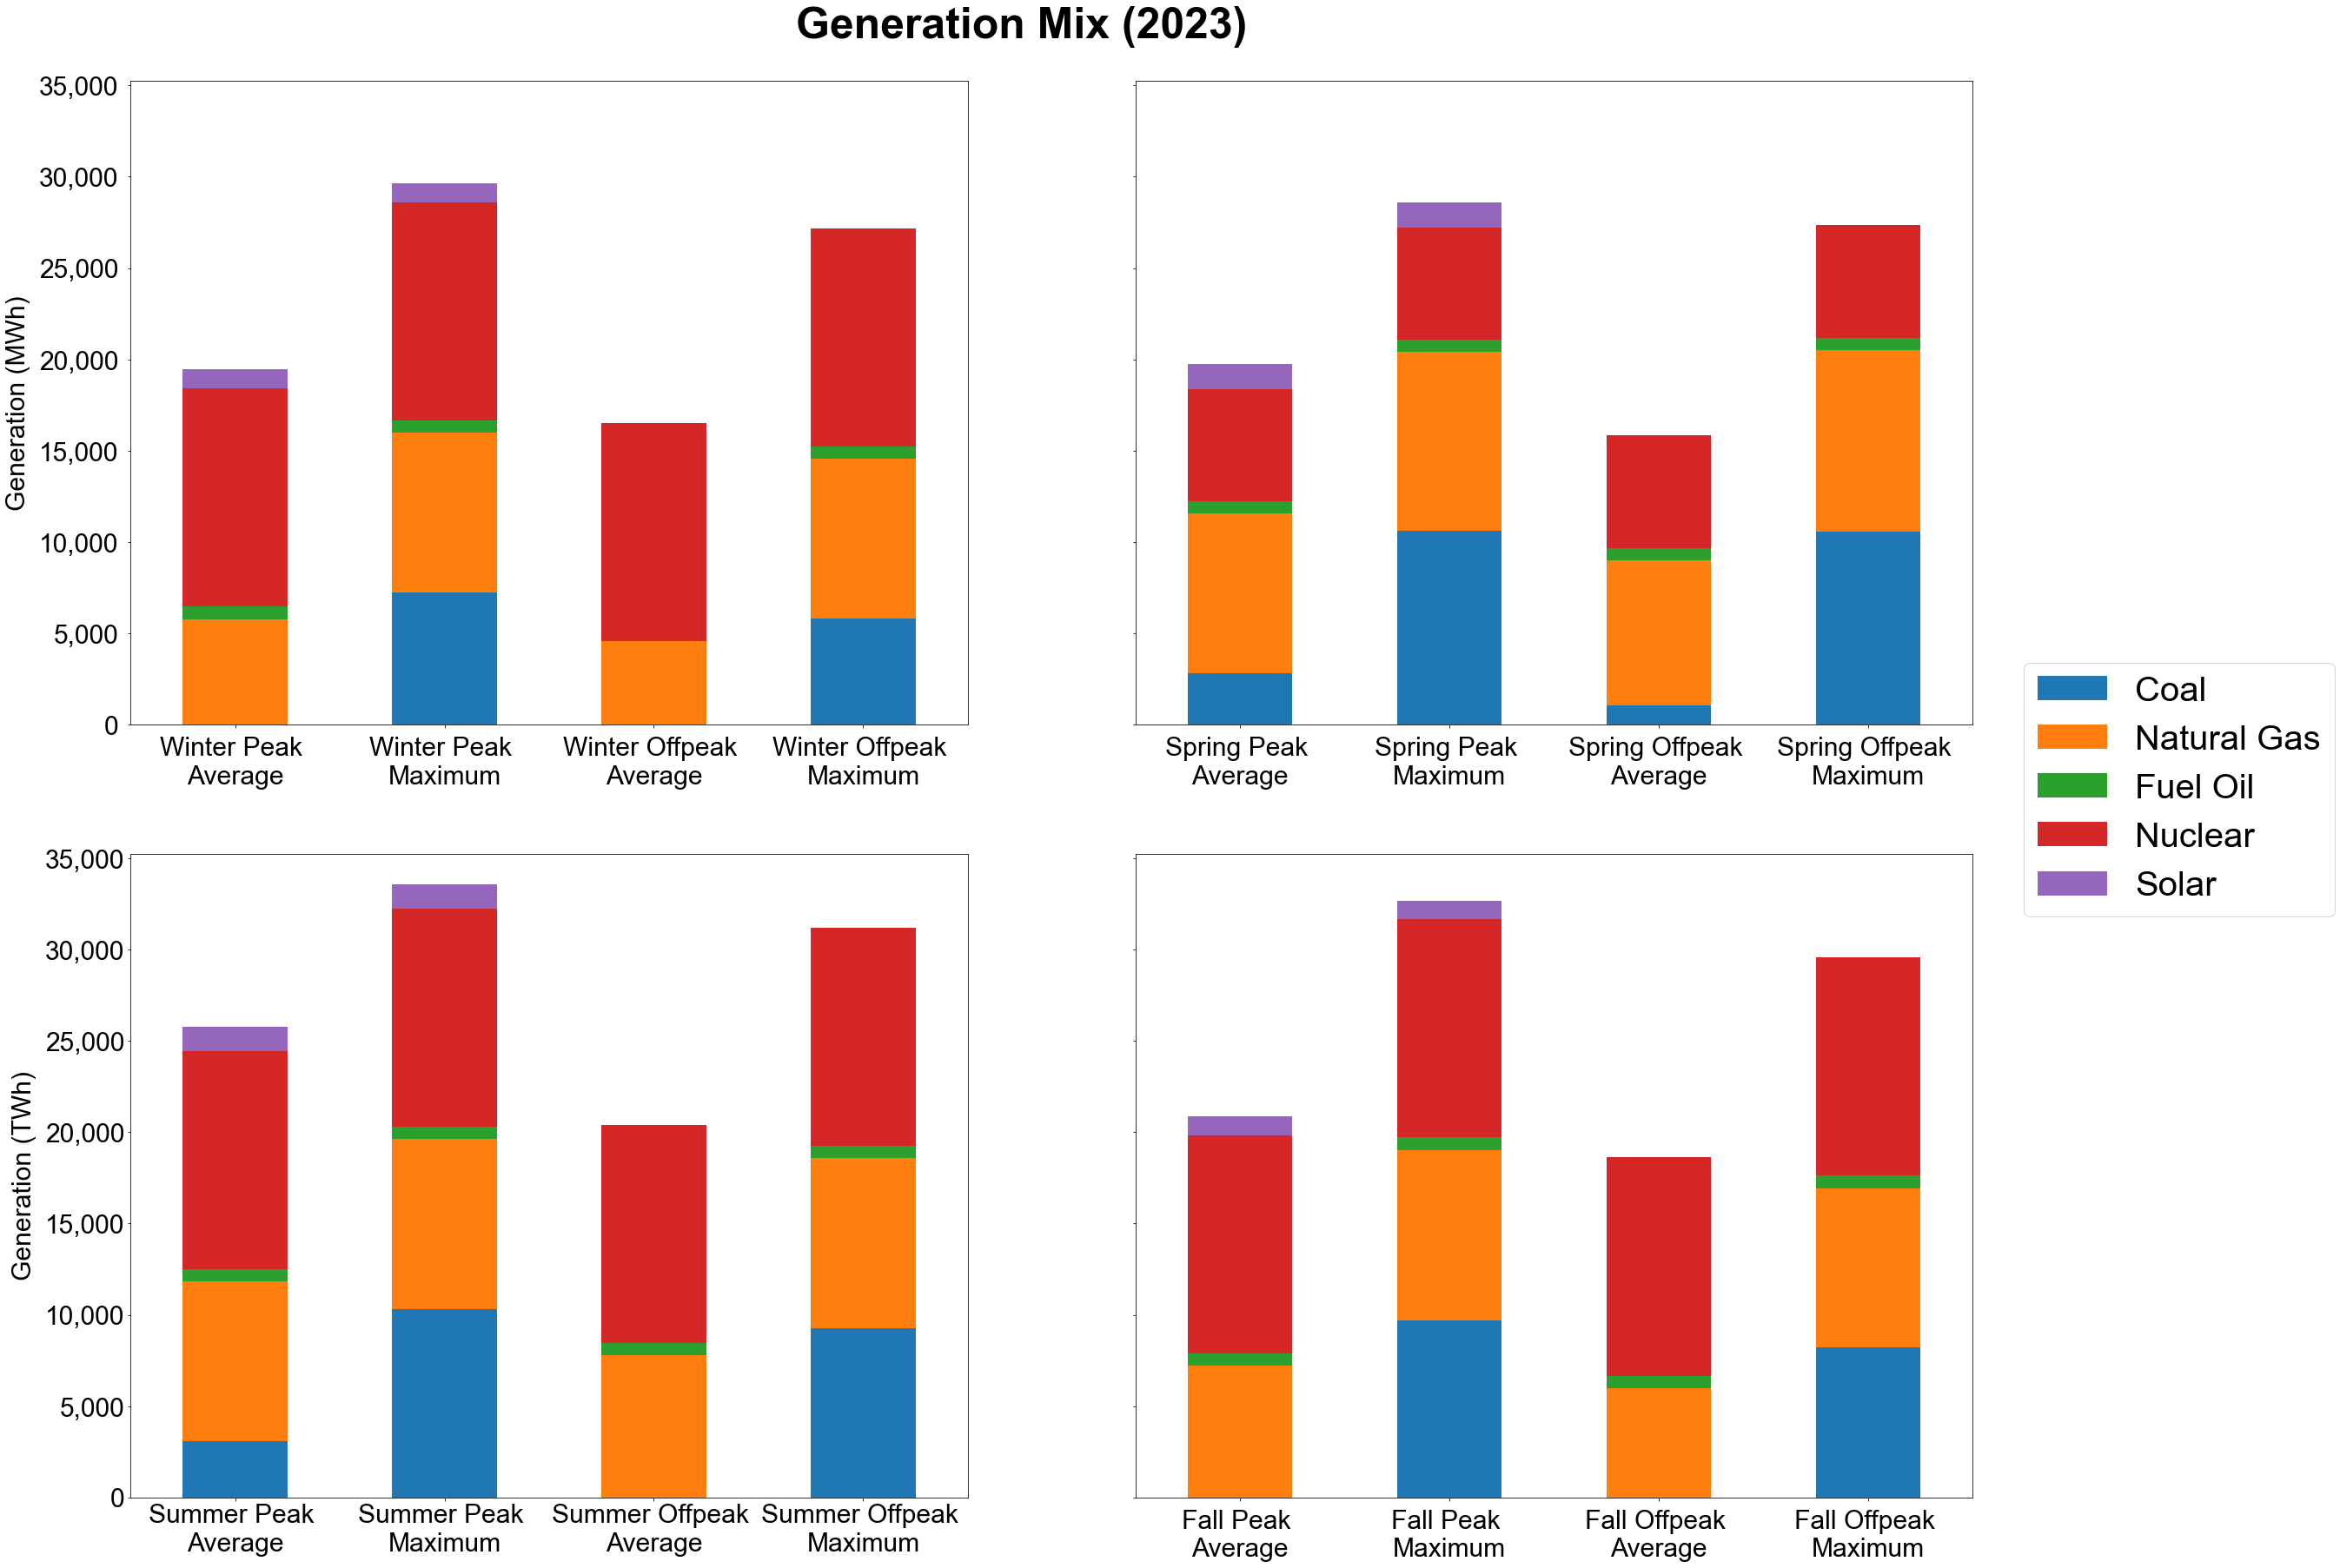

<Figure size 432x288 with 0 Axes>

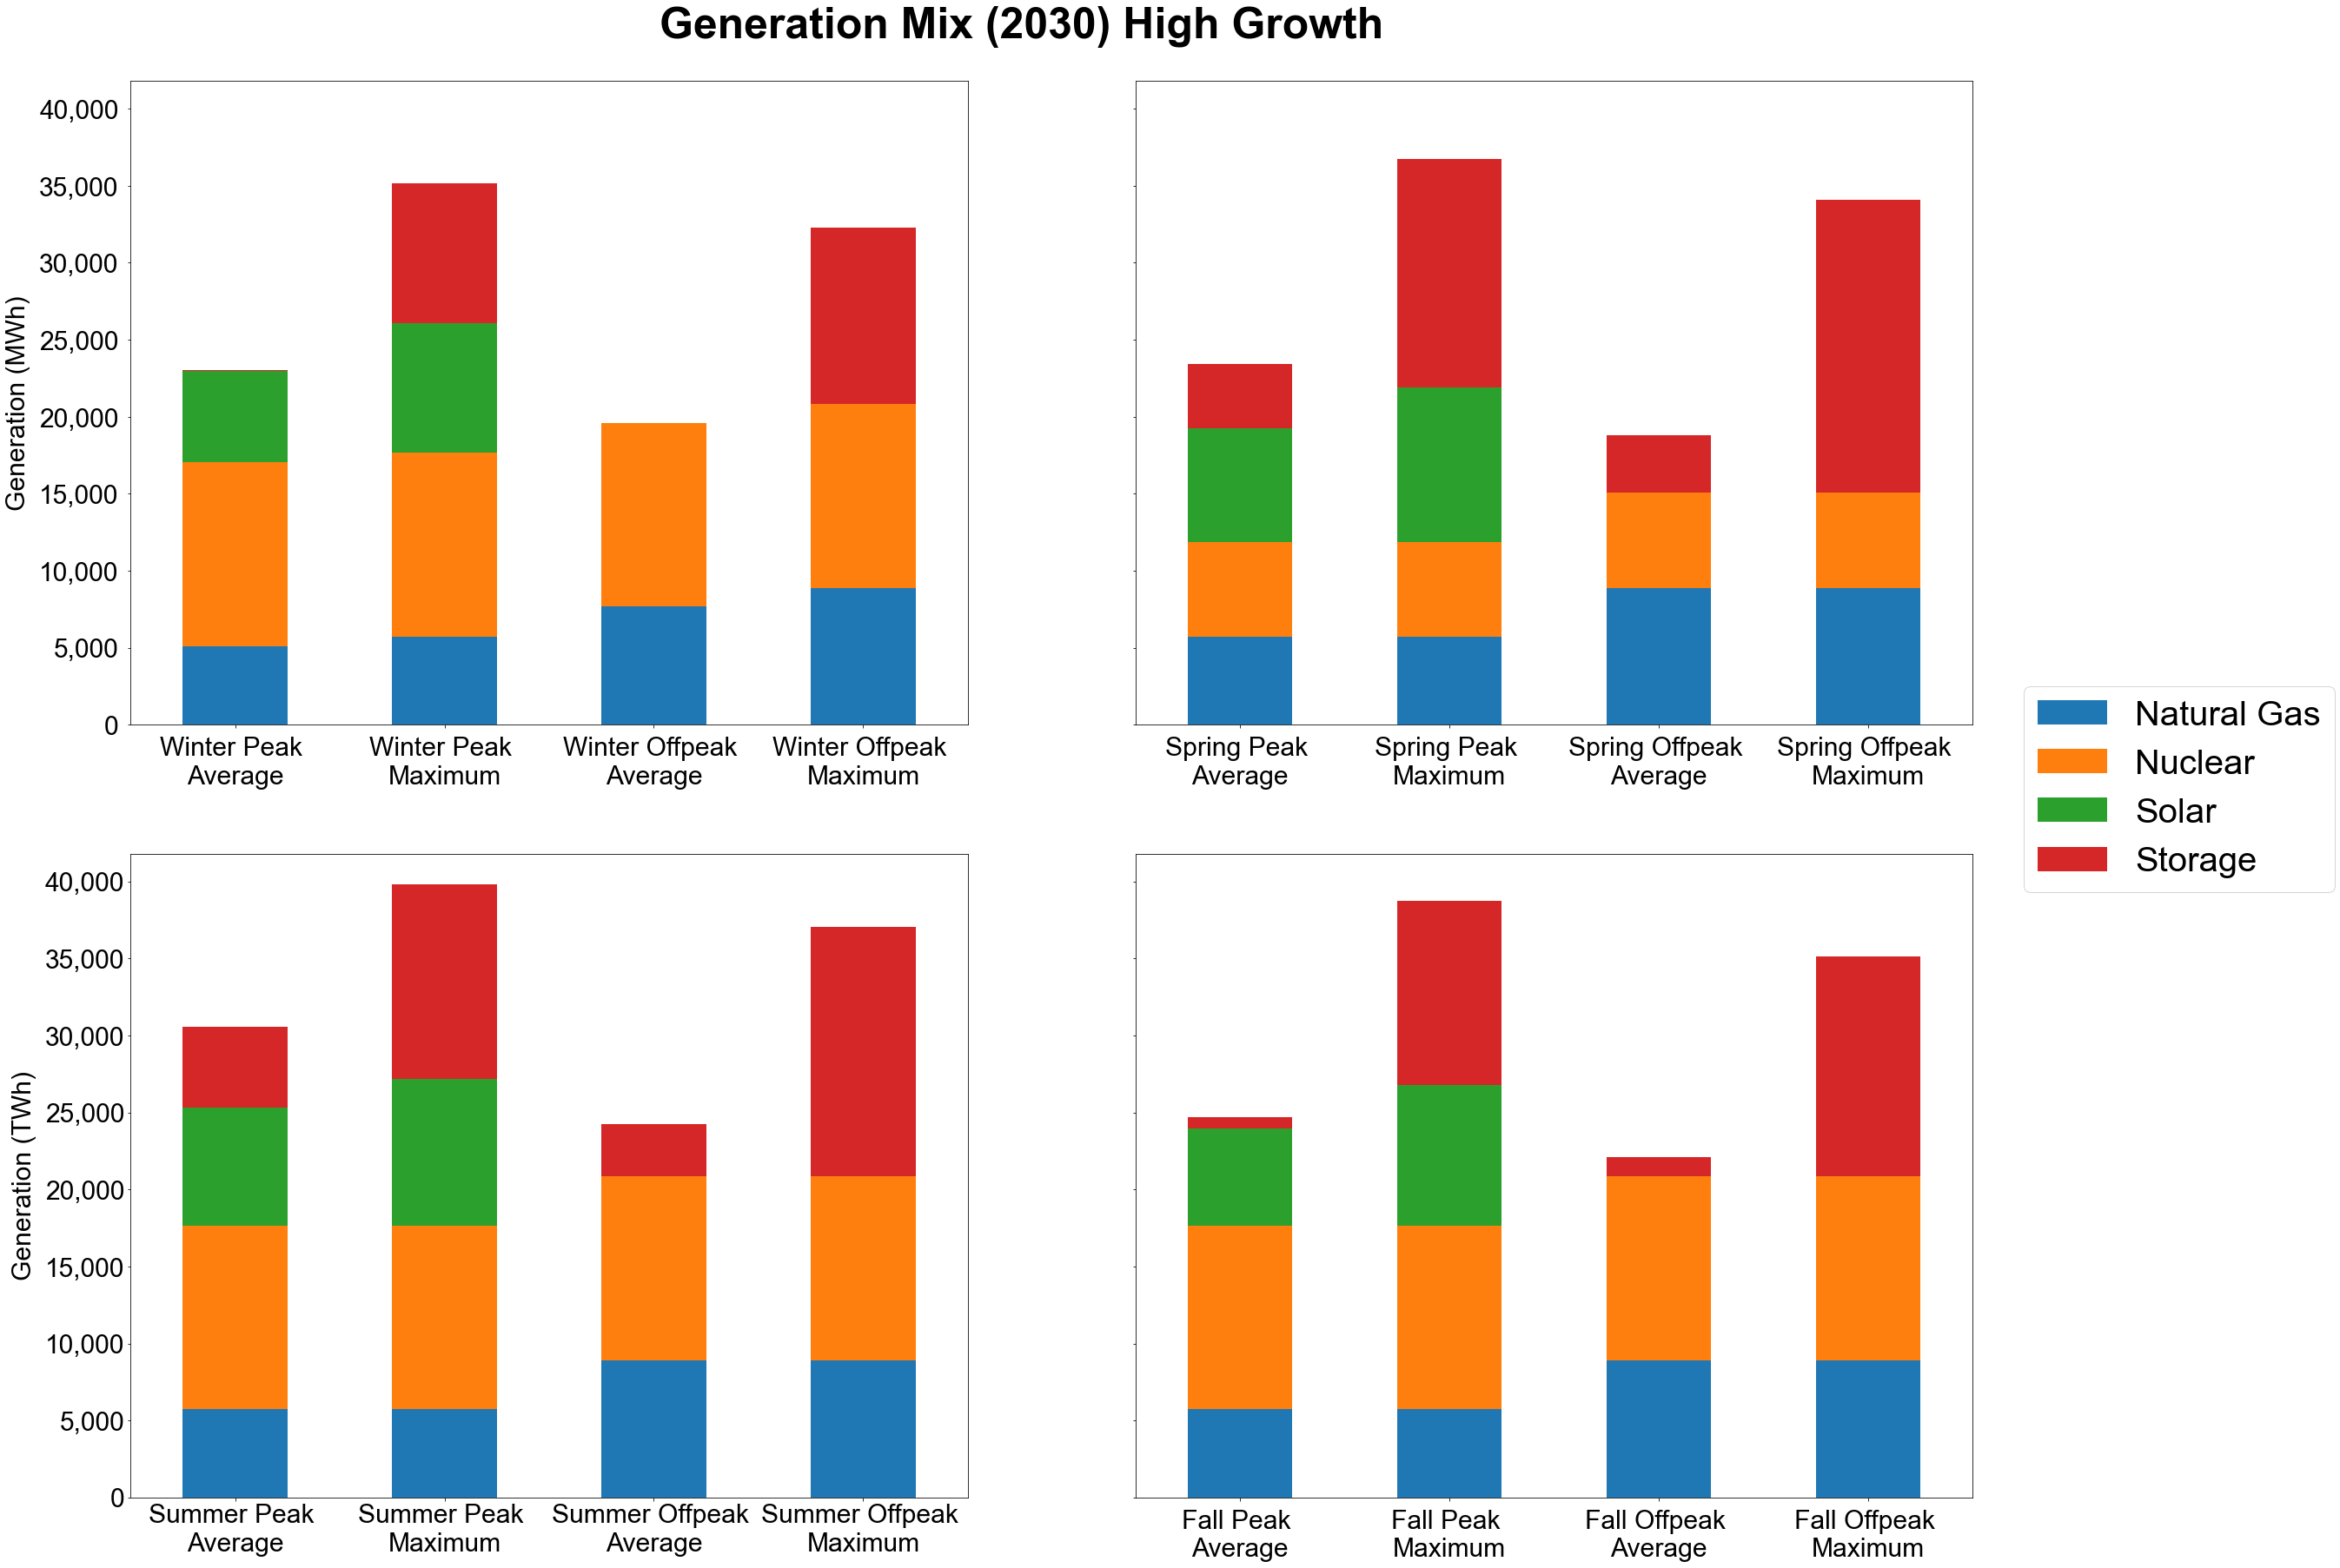

<Figure size 432x288 with 0 Axes>

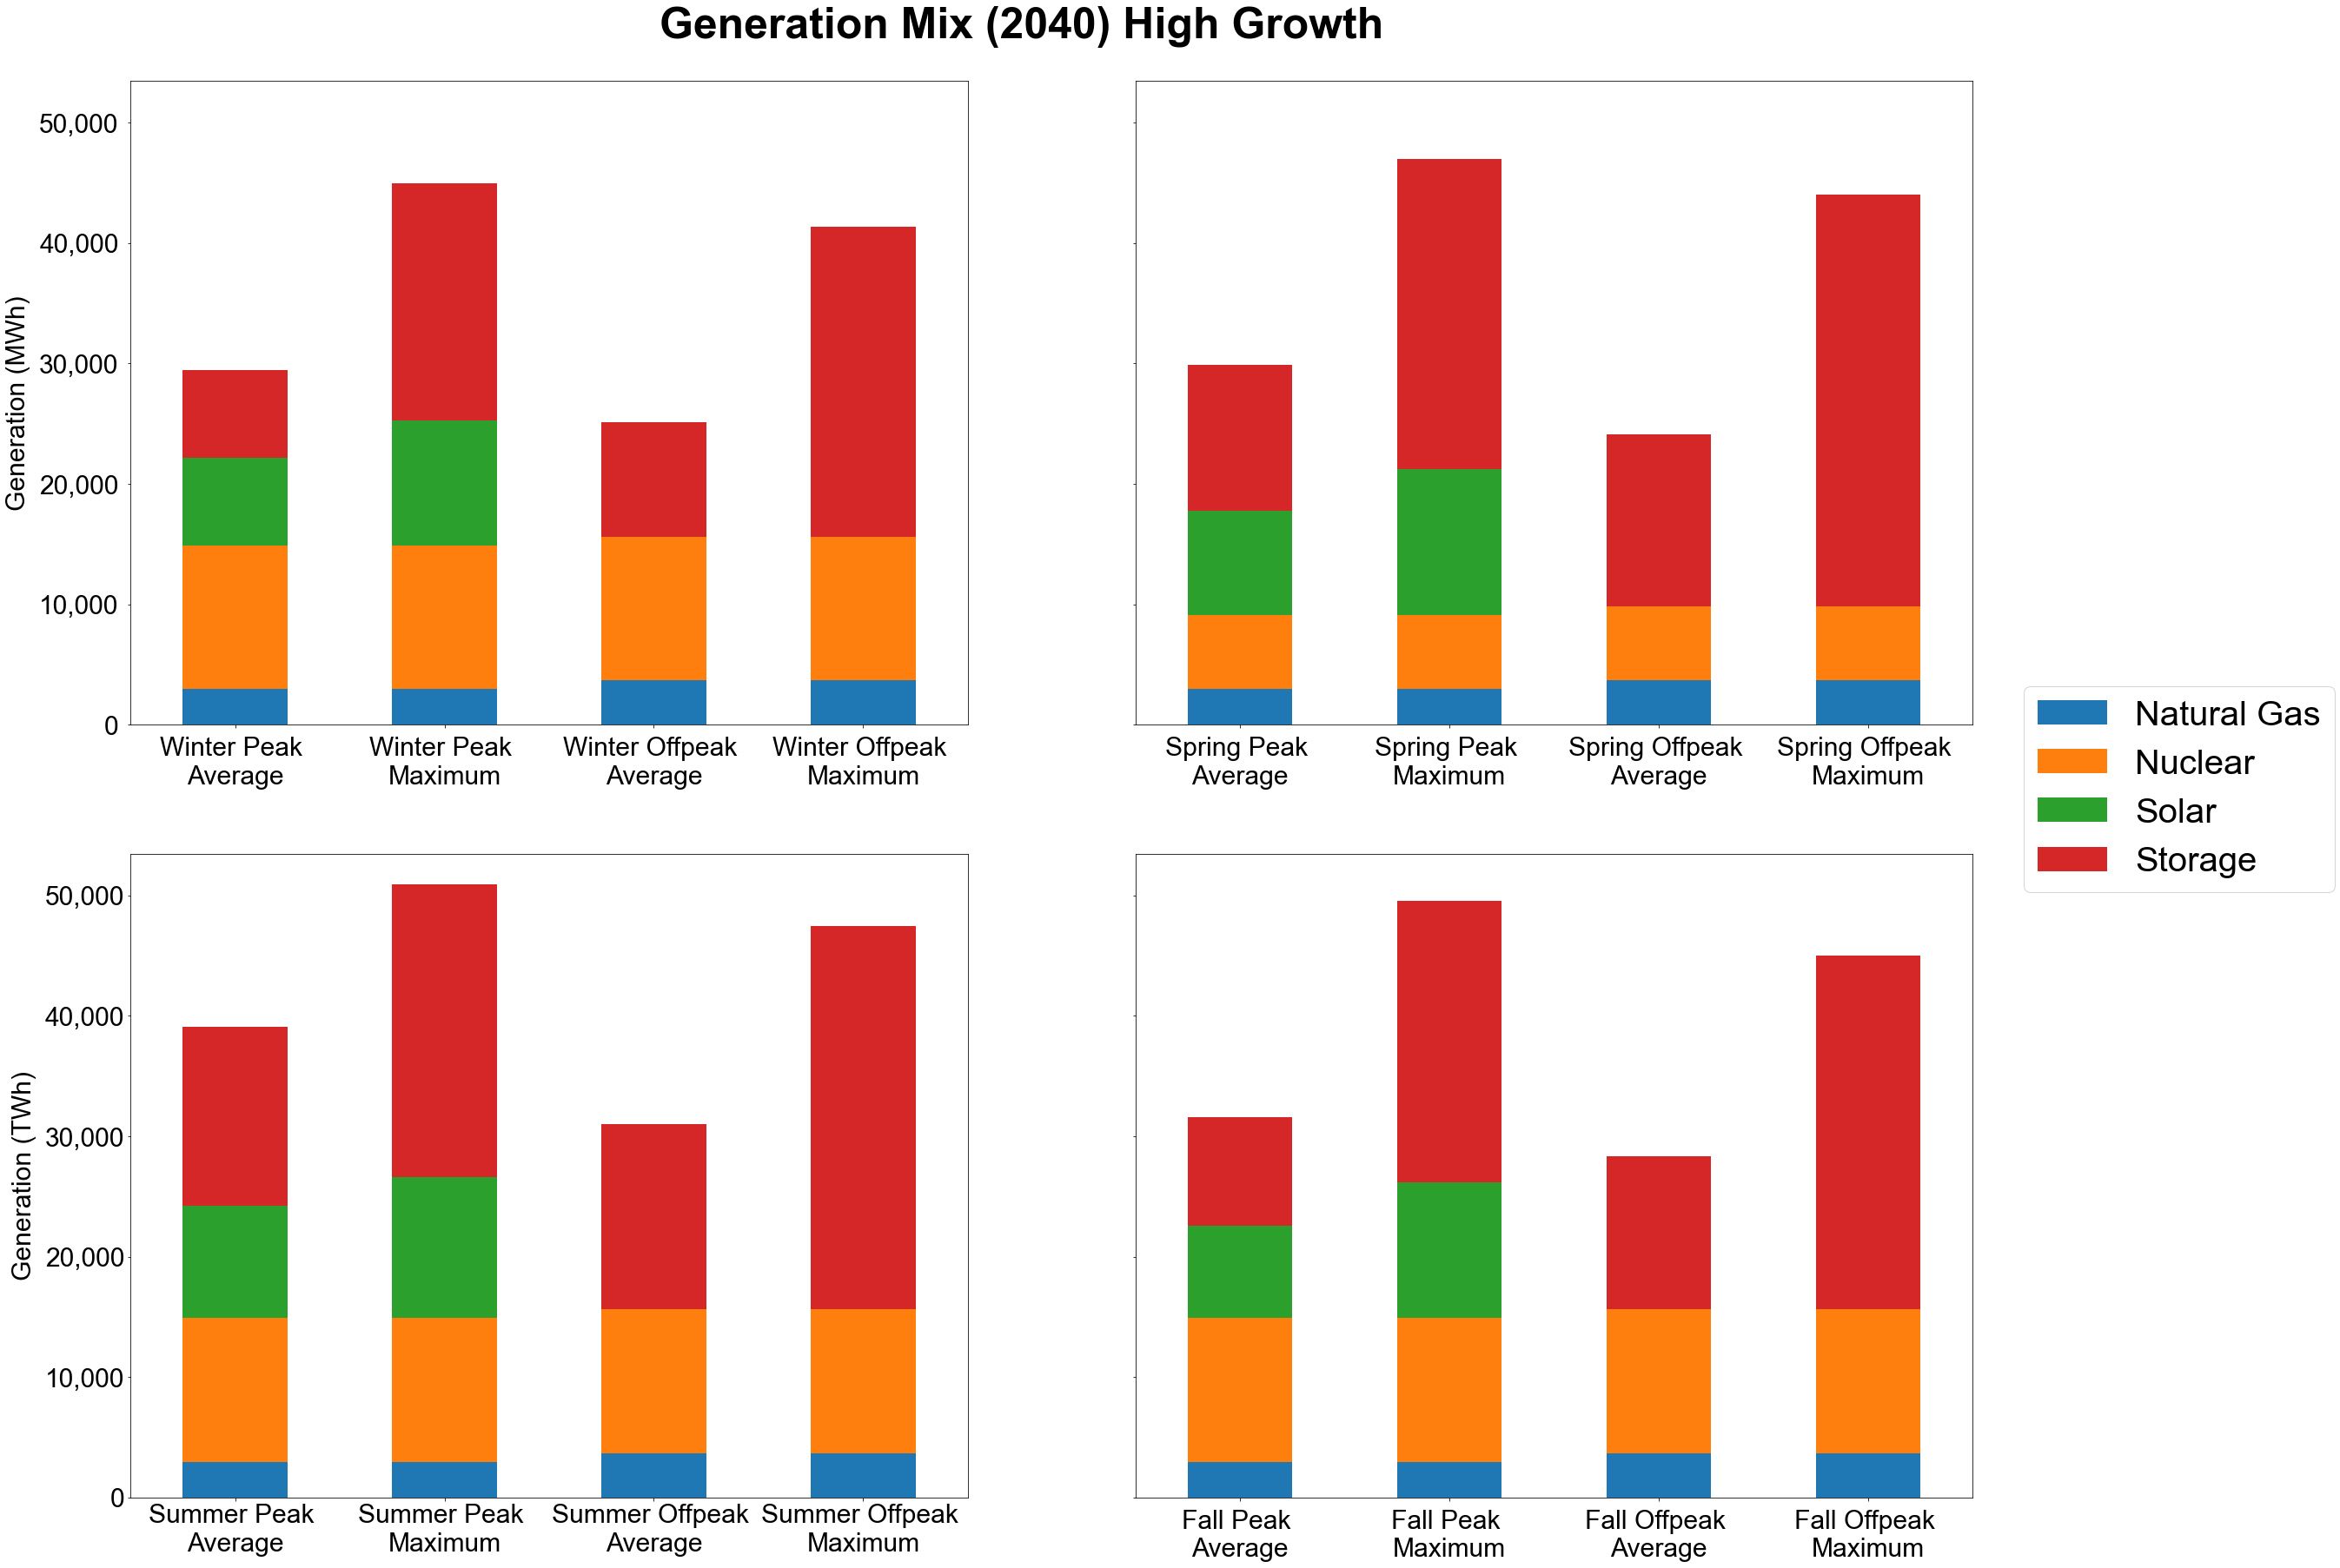

<Figure size 432x288 with 0 Axes>

In [5]:
#Filtering the generation data and plotting bar plots           
for year in years:
    
    if year == 2023:
        
        gen_types = ['Coal','Natural Gas','Fuel Oil','Nuclear','Solar']
        
        try:
                
            Dispatchable=pd.read_excel('../Results/Results_BAU_{}_specific_reserve_margin_with_solar.xlsx'.format(year),sheet_name='DispatchableGen_MWh',header=0)
            Nuclear=pd.read_excel('../Results/Results_BAU_{}_specific_reserve_margin_with_solar.xlsx'.format(year),sheet_name='NuclearGen_MWh',header=0)
            generation_comparison = pd.DataFrame(np.zeros((len(All_cases),len(gen_types))),columns=gen_types)
            Dispatchable_agg = Dispatchable.groupby('Fuel Type').sum()
            Nuclear_agg = Nuclear.groupby('Fuel Type').sum()
            Solar=pd.read_excel('../Results/Results_BAU_{}_specific_reserve_margin_with_solar.xlsx'.format(year),sheet_name='Solar_MWh',header=0)
            Solar_agg = Solar.sum()

            for case in All_cases:

                idx = All_cases.index(case)
                Dispatchable_sp = Dispatchable_agg.loc[:,case].copy()
                Nuclear_sp = Nuclear_agg.loc[:,case].copy()
                Solar_sp = Solar_agg[case]
                generation_comparison.loc[idx,:] = [Dispatchable_sp['Coal'],Dispatchable_sp['Natural Gas'],Dispatchable_sp['Fuel Oil'],Nuclear_sp['Nuclear'],Solar_sp]

            generation_comparison.index = All_cases
            generation_comparison = generation_comparison.apply(lambda x: round(x,1))
        
            seasons = ['Winter','Spring','Summer','Fall']
            
            Winter_data = generation_comparison.iloc[0:4,:]
            Spring_data = generation_comparison.iloc[4:8,:]
            Summer_data = generation_comparison.iloc[8:12,:]
            Fall_data = generation_comparison.iloc[12:16,:]
            
            fig, ax = plt.subplots(2,2 , figsize=(38,30),sharey=True)
            plt.rcParams.update({'font.size': 30})
            plt.rcParams['font.sans-serif'] = "Arial"

            axis_fontsize=25
            axis_label_pad = 10
            tick_pad = 10
            
            j=-1
            k=-1
            for S in seasons:
                if S == 'Winter' or S == 'Spring':
                    j+=1
                    globals()['{}_data'.format(S)].plot(kind='bar', stacked=True, ax=ax[0,j])
                    ax[0,j].legend('',frameon=False)
                    ax[0,j].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                    ax[0,j].tick_params(axis='both', which='both', pad=tick_pad)
                else:
                    k+=1
                    globals()['{}_data'.format(S)].plot(kind='bar', stacked=True, ax=ax[1,k])
                    ax[1,k].legend('',frameon=False)
                    ax[1,k].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                    ax[1,j].tick_params(axis='both', which='both', pad=tick_pad)
                    if k==1:
                        plt.legend(bbox_to_anchor=(1.04,1.1), loc="center left", fontsize=40)
                
                    
            ax[0,0].set_ylabel('Generation (MWh)', labelpad=axis_label_pad)
            ax[1,0].set_ylabel('Generation (TWh)', labelpad=axis_label_pad)
            plt.suptitle('Generation Mix ({})'.format(year),weight='bold',y=0.92, fontsize=50)
            
            ax[0,0].set_xticklabels(['Winter Peak \nAverage','Winter Peak \nMaximum','Winter Offpeak \nAverage','Winter Offpeak \nMaximum'],rotation=360)
            ax[0,1].set_xticklabels(['Spring Peak \nAverage','Spring Peak \nMaximum','Spring Offpeak \nAverage','Spring Offpeak \nMaximum'],rotation=360)
            ax[1,0].set_xticklabels(['Summer Peak \nAverage','Summer Peak \nMaximum','Summer Offpeak \nAverage','Summer Offpeak \nMaximum'],rotation=360)
            ax[1,1].set_xticklabels(['Fall Peak \nAverage','Fall Peak \nMaximum','Fall Offpeak \nAverage','Fall Offpeak \nMaximum'],rotation=360)

            plt.savefig('Generation_mix/Genmix_bar ({}).png'.format(year), dpi=200, bbox_inches='tight')
            plt.show()
            plt.clf()
                
        except FileNotFoundError:
            pass
        
    else:
        
        gen_types = ['Natural Gas','Nuclear','Solar', 'Storage']
    
        try:
                
            Dispatchable=pd.read_excel('../Results/Results_BAU_{}_specific_reserve_margin_high.xlsx'.format(year),sheet_name='DispatchableGen_MWh',header=0)
            Nuclear=pd.read_excel('../Results/Results_BAU_{}_specific_reserve_margin_high.xlsx'.format(year),sheet_name='NuclearGen_MWh',header=0)
            generation_comparison = pd.DataFrame(np.zeros((len(All_cases),len(gen_types))),columns=gen_types)
            Dispatchable_agg = Dispatchable.groupby('Fuel Type').sum()
            Nuclear_agg = Nuclear.groupby('Fuel Type').sum()
            Solar=pd.read_excel('../Results/Results_BAU_{}_specific_reserve_margin_high.xlsx'.format(year),sheet_name='Solar_MWh',header=0)
            Solar_agg = Solar.sum()

            for case in All_cases:

                idx = All_cases.index(case)
                Dispatchable_sp = Dispatchable_agg.loc[:,case].copy()
                Nuclear_sp = Nuclear_agg.loc[:,case].copy()
                Solar_sp = Solar_agg[case]
                generation_comparison.loc[idx,:] = [Dispatchable_sp['Natural Gas'],Nuclear_sp['Nuclear'],Solar_sp,Dispatchable_sp['Storage']]

            generation_comparison.index = All_cases
            generation_comparison = generation_comparison.apply(lambda x: round(x,1))
        
            seasons = ['Winter','Spring','Summer','Fall']
            
            Winter_data = generation_comparison.iloc[0:4,:]
            Spring_data = generation_comparison.iloc[4:8,:]
            Summer_data = generation_comparison.iloc[8:12,:]
            Fall_data = generation_comparison.iloc[12:16,:]
            
            fig, ax = plt.subplots(2,2 , figsize=(38,30),sharey=True)
            plt.rcParams.update({'font.size': 30})
            plt.rcParams['font.sans-serif'] = "Arial"

            axis_fontsize=25
            axis_label_pad = 10
            tick_pad = 10
            
            j=-1
            k=-1
            for S in seasons:
                if S == 'Winter' or S == 'Spring':
                    j+=1
                    globals()['{}_data'.format(S)].plot(kind='bar', stacked=True, ax=ax[0,j])
                    ax[0,j].legend('',frameon=False)
                    ax[0,j].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                    ax[0,j].tick_params(axis='both', which='both', pad=tick_pad)
                else:
                    k+=1
                    globals()['{}_data'.format(S)].plot(kind='bar', stacked=True, ax=ax[1,k])
                    ax[1,k].legend('',frameon=False)
                    ax[1,k].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
                    ax[1,j].tick_params(axis='both', which='both', pad=tick_pad)
                    if k==1:
                        plt.legend(bbox_to_anchor=(1.04,1.1), loc="center left", fontsize=40)
                
                    
            ax[0,0].set_ylabel('Generation (MWh)', labelpad=axis_label_pad)
            ax[1,0].set_ylabel('Generation (TWh)', labelpad=axis_label_pad)
            plt.suptitle('Generation Mix ({}) High Growth'.format(year),weight='bold',y=0.92, fontsize=50)
            
            ax[0,0].set_xticklabels(['Winter Peak \nAverage','Winter Peak \nMaximum','Winter Offpeak \nAverage','Winter Offpeak \nMaximum'],rotation=360)
            ax[0,1].set_xticklabels(['Spring Peak \nAverage','Spring Peak \nMaximum','Spring Offpeak \nAverage','Spring Offpeak \nMaximum'],rotation=360)
            ax[1,0].set_xticklabels(['Summer Peak \nAverage','Summer Peak \nMaximum','Summer Offpeak \nAverage','Summer Offpeak \nMaximum'],rotation=360)
            ax[1,1].set_xticklabels(['Fall Peak \nAverage','Fall Peak \nMaximum','Fall Offpeak \nAverage','Fall Offpeak \nMaximum'],rotation=360)

            plt.savefig('Generation_mix/Genmix_bar ({}) High Growth.png'.format(year), dpi=200, bbox_inches='tight')
            plt.show()
            plt.clf()
                
        except FileNotFoundError:
            pass

        

,Natural Gas,Nuclear,Solar,Storage
Winter_Peak_Average,2974.8,11942.3,7221.7,7287.6
Winter_Peak_Maximum,2974.8,11942.3,10326.4,19706.4
Winter_Offpeak_Average,3672.7,11942.3,0.0,9497.7
Winter_Offpeak_Maximum,3672.7,11942.3,0.0,25716.7
Spring_Peak_Average,2974.8,6155.8,8663.4,12104.1
Spring_Peak_Maximum,2974.8,6155.8,12076.4,25756.0
Spring_Offpeak_Average,3672.7,6155.8,0.0,14272.4
Spring_Offpeak_Maximum,3672.7,6155.8,0.0,34172.1
Summer_Peak_Average,2974.8,11942.3,9340.3,14803.9
Summer_Peak_Maximum,2974.8,11942.3,11709.4,24280.5
